In [2]:
from ggplot import *
import pandas as pd
import numpy as np

/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("./baseball-pitches-clean.csv")
df = df[['pitch_time', 'inning', 'pitcher_name', 'hitter_name', 'pitch_type', 
         'px', 'pz', 'pitch_name', 'start_speed', 'end_speed', 'type_confidence']]
df.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence
0,2013-10-01 20:07:43 -0400,1,Francisco Liriano,Shin-Soo Choo,B,0.628,1.547,Fastball,93.2,85.3,0.894
1,2013-10-01 20:07:57 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.545,3.069,Fastball,93.4,85.6,0.895
2,2013-10-01 20:08:12 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.120,1.826,Slider,89.1,82.8,0.931
3,2013-10-01 20:08:31 -0400,1,Francisco Liriano,Shin-Soo Choo,S,-0.229,1.667,Slider,90.0,83.3,0.926
4,2013-10-01 20:09:09 -0400,1,Francisco Liriano,Ryan Ludwick,B,-1.917,0.438,Slider,87.7,81.6,0.915


## Question: How does fatigue affect pitch_speed?

In [5]:
df['game_date'] = df.pitch_time.str.slice(0, 10)
df['pitch_count'] = 1
df['pitch_count'] = df.groupby(["pitcher_name", "game_date"]).pitch_count.cumsum()

In [6]:
df.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence,game_date,pitch_count
0,2013-10-01 20:07:43 -0400,1,Francisco Liriano,Shin-Soo Choo,B,0.628,1.547,Fastball,93.2,85.3,0.894,2013-10-01,1
1,2013-10-01 20:07:57 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.545,3.069,Fastball,93.4,85.6,0.895,2013-10-01,2
2,2013-10-01 20:08:12 -0400,1,Francisco Liriano,Shin-Soo Choo,S,0.120,1.826,Slider,89.1,82.8,0.931,2013-10-01,3
3,2013-10-01 20:08:31 -0400,1,Francisco Liriano,Shin-Soo Choo,S,-0.229,1.667,Slider,90.0,83.3,0.926,2013-10-01,4
4,2013-10-01 20:09:09 -0400,1,Francisco Liriano,Ryan Ludwick,B,-1.917,0.438,Slider,87.7,81.6,0.915,2013-10-01,5


In [7]:
df[["pitcher_name", "game_date", "pitch_count"]].head()

,pitcher_name,game_date,pitch_count
0,Francisco Liriano,2013-10-01,1
1,Francisco Liriano,2013-10-01,2
2,Francisco Liriano,2013-10-01,3
3,Francisco Liriano,2013-10-01,4
4,Francisco Liriano,2013-10-01,5


In [8]:
df[["pitcher_name", "game_date", "pitch_count"]].tail()

,pitcher_name,game_date,pitch_count
133596,Bruce Rondon,2013-08-27,11
133597,Bruce Rondon,2013-08-27,12
133598,Bruce Rondon,2013-08-27,13
133599,Bruce Rondon,2013-08-27,14
133600,Bruce Rondon,2013-08-27,15


### Plot puke
(plotting "big data" is no bueno)

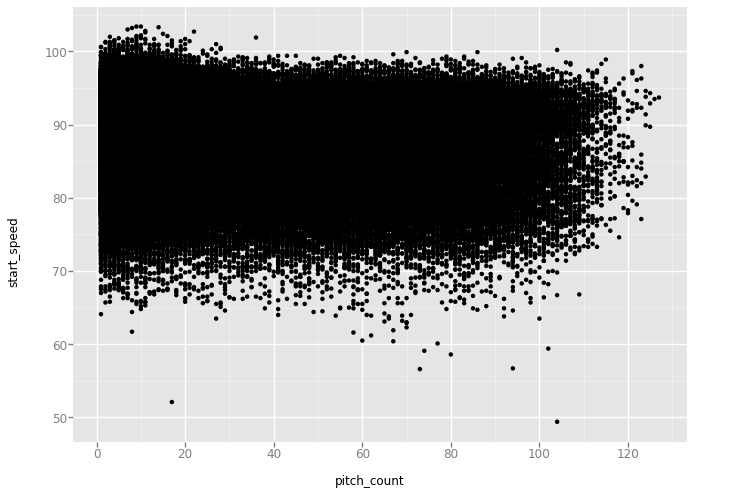

<ggplot: (-9223369104754732863)>

In [9]:
ggplot(aes(x='pitch_count', y='start_speed'), data=df) +\
    geom_point()

### What if we could aggregate the data somehow?

In steps `stat_smooth`. `stat_smooth` provides some built in smoothing functionality

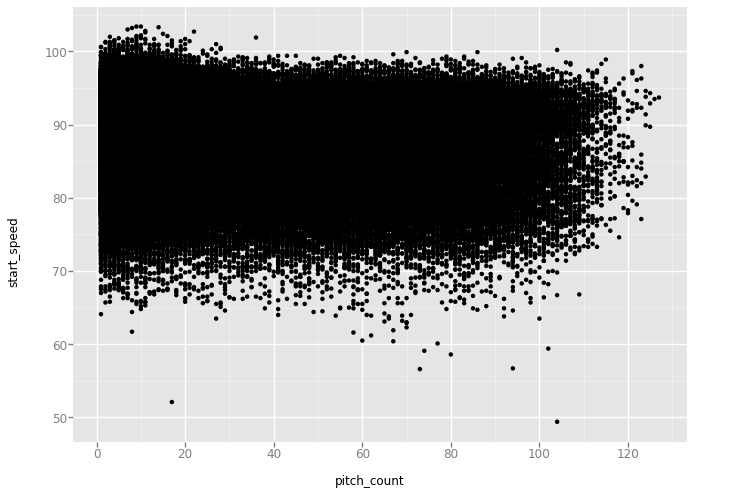

<ggplot: (2932098174633)>

In [10]:
ggplot(aes(x='pitch_count', y='start_speed'), data=df) +\
    geom_point(position = 'jitter')

AttributeError: 'DataFrame' object has no attribute 'sort'

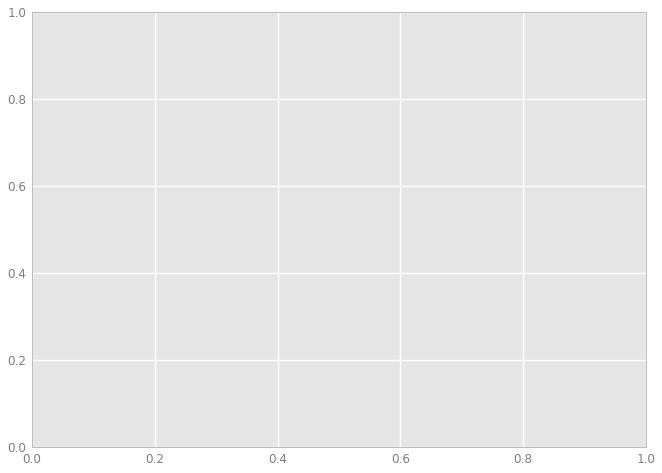

In [12]:
ggplot(aes(x='pitch_count', y='start_speed'), data=df) +\
    stat_smooth(span=0.3)

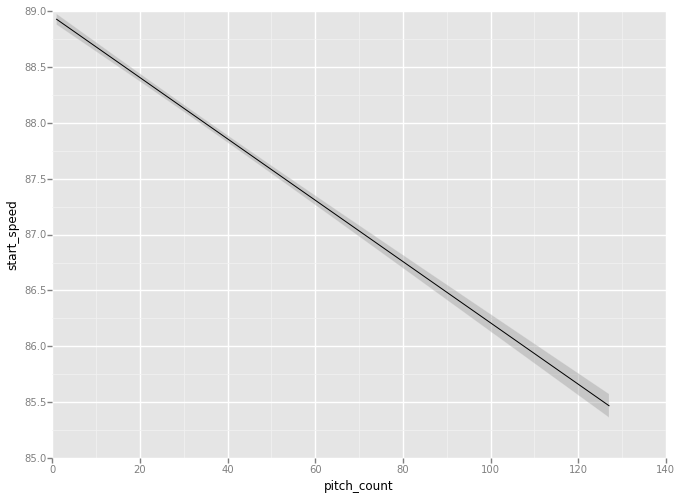

<ggplot: (290439341)>

In [7]:
ggplot(aes(x='pitch_count', y='start_speed'), data=df) +\
    stat_smooth(method='lm')

### How does the type of pitch affect this?

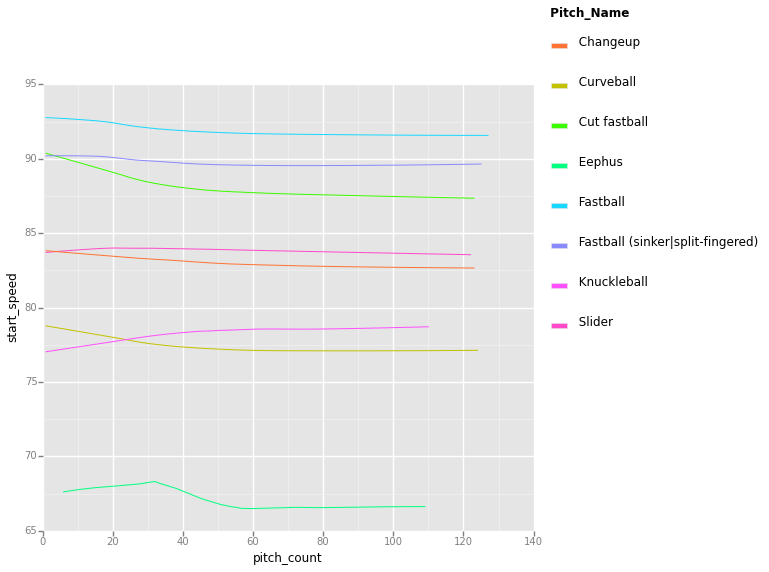

<ggplot: (307299317)>

In [8]:
ggplot(aes(x='pitch_count', y='start_speed', color='pitch_name'), data=df) +\
    stat_smooth(se=False)

### What if we focus on an individual?

In [13]:
df.pitcher_name.value_counts().head(10)

David Price         762
Justin Verlander    755
Chris Tillman       727
Andy Pettitte       718
Ubaldo Jimenez      698
Yu Darvish          695
Jason Vargas        691
Wade Miley          677
Jon Lester          674
J.A. Happ           672
Name: pitcher_name, dtype: int64

In [14]:
pitcher = df[df.pitcher_name=="David Price"]
pitches = (pitcher.pitch_name.value_counts() > 10)
pitcher = pitcher[pitcher.pitch_name.isin(pitches[pitches].index)]
pitcher.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence,game_date,pitch_count
284,2013-09-30 20:21:12 -0400,1,David Price,Ian Kinsler,B,0.152,3.831,Fastball,93.2,85.9,0.926,2013-09-30,1
285,2013-09-30 20:21:26 -0400,1,David Price,Ian Kinsler,S,0.618,1.273,Changeup,83.8,78.0,2.000,2013-09-30,2
286,2013-09-30 20:21:51 -0400,1,David Price,Ian Kinsler,S,0.703,2.899,Fastball,93.7,87.1,2.000,2013-09-30,3
287,2013-09-30 20:22:15 -0400,1,David Price,Ian Kinsler,B,-2.156,1.739,Fastball,94.9,87.5,0.941,2013-09-30,4
288,2013-09-30 20:22:30 -0400,1,David Price,Ian Kinsler,B,-1.953,1.949,Fastball,94.2,86.2,2.000,2013-09-30,5


#### Subsetting by inning...

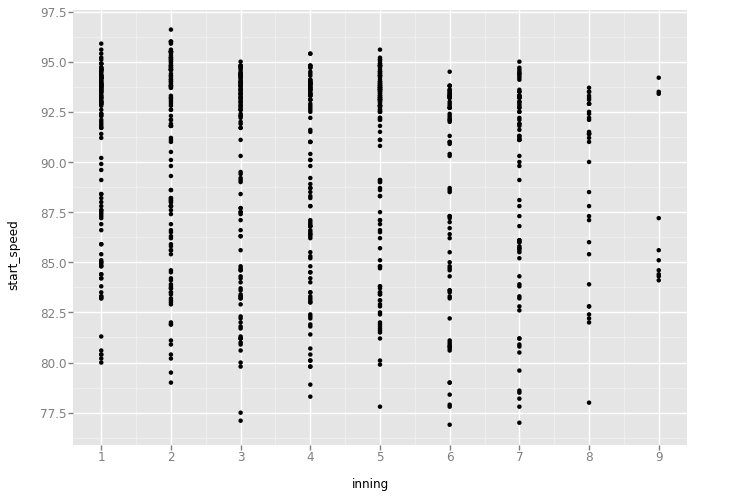

<ggplot: (2932265445682)>

In [15]:
ggplot(aes(x='inning', y='start_speed'), data=pitcher) +\
    geom_jitter()

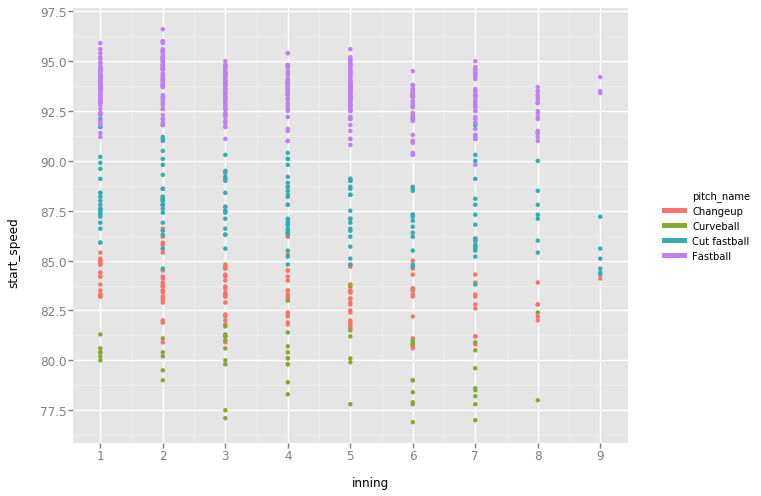

<ggplot: (-9223369104602131596)>

In [16]:
ggplot(aes(x='inning', y='start_speed', color='pitch_name'), data=pitcher) +\
    geom_jitter()

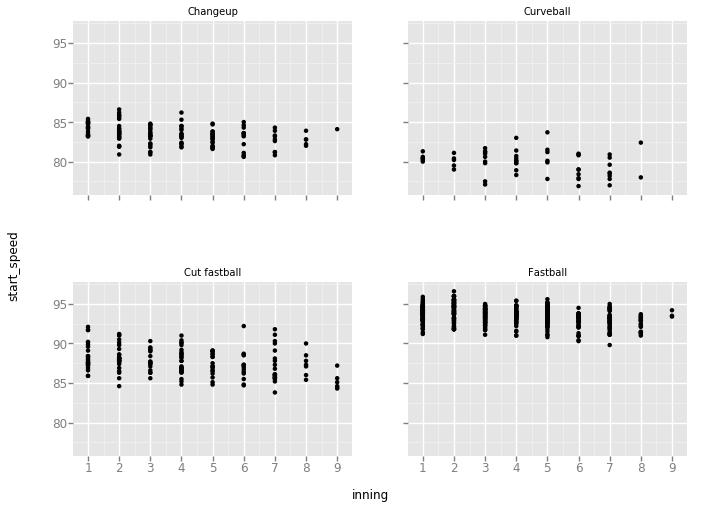

<ggplot: (-9223369104601968945)>

In [18]:
ggplot(aes(x='inning', y='start_speed'), data=pitcher) +\
    geom_jitter() +\
    facet_wrap("pitch_name")

AttributeError: 'DataFrame' object has no attribute 'sort'

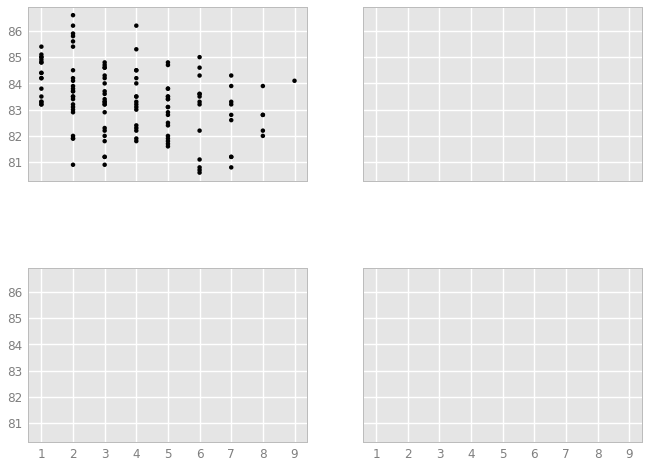

In [21]:
ggplot(aes(x='inning', y='start_speed'), data=pitcher) +\
    geom_jitter() +\
    stat_smooth(method='lm', color='blue') +\
    facet_wrap("pitch_name")

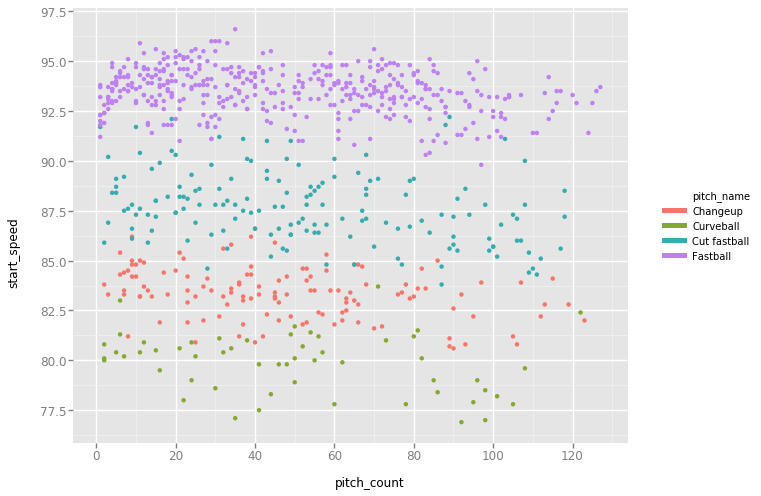

<ggplot: (2932253506259)>

In [22]:
ggplot(aes(x='pitch_count', y='start_speed', color='pitch_name'), data=pitcher) +\
    geom_jitter()

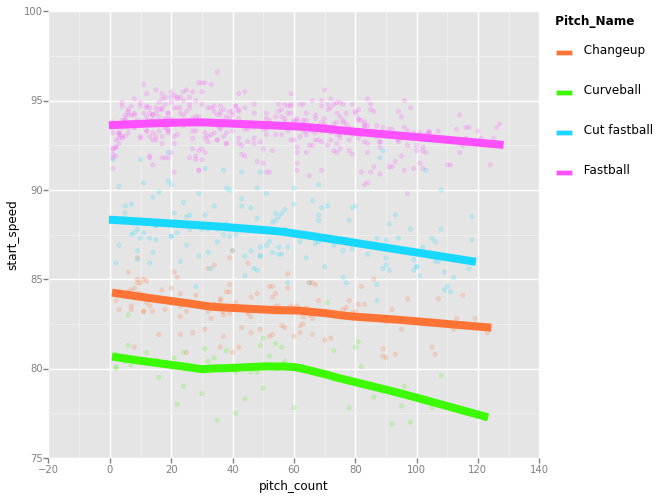

<ggplot: (292003461)>

In [11]:
ggplot(aes(x='pitch_count', y='start_speed', color='pitch_name'), data=pitcher) +\
    stat_smooth(se=False, size=8) + \
    geom_point(alpha=0.2)

## *NOTE* Check out Justin Verlander

In [23]:
pitcher = df[df.pitcher_name=="Justin Verlander"]
pitches = (pitcher.pitch_name.value_counts() > 10)
pitcher = pitcher[pitcher.pitch_name.isin(pitches[pitches].index)]
pitcher.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,px,pz,pitch_name,start_speed,end_speed,type_confidence,game_date,pitch_count
871,2013-09-29 13:16:29 -0400,1,Justin Verlander,Juan Pierre,B,-1.422,2.909,Fastball,91.8,83.5,2.0,2013-09-29,1
872,2013-09-29 13:16:43 -0400,1,Justin Verlander,Juan Pierre,S,-0.868,2.379,Fastball,91.0,83.1,2.0,2013-09-29,2
873,2013-09-29 13:17:06 -0400,1,Justin Verlander,Juan Pierre,X,0.033,1.891,Fastball,91.5,82.8,2.0,2013-09-29,3
874,2013-09-29 13:17:51 -0400,1,Justin Verlander,Ed Lucas,S,0.670,3.067,Fastball,91.0,82.9,2.0,2013-09-29,4
875,2013-09-29 13:18:06 -0400,1,Justin Verlander,Ed Lucas,S,0.702,1.819,Fastball,90.6,82.9,2.0,2013-09-29,5


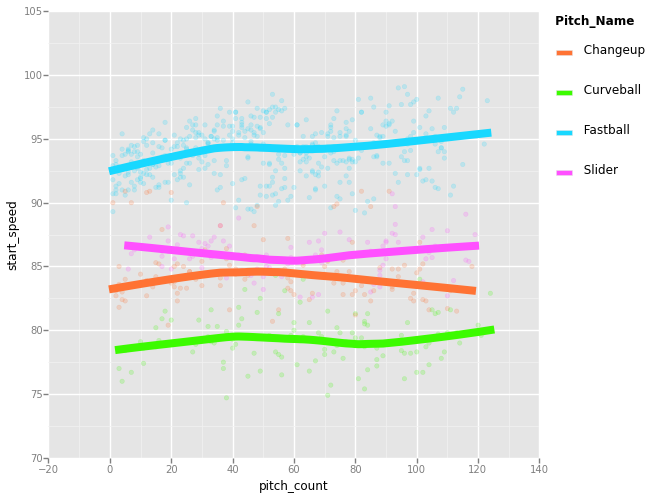

<ggplot: (283254277)>

In [21]:
ggplot(aes(x='pitch_count', y='start_speed', color='pitch_name'), data=pitcher) +\
    stat_smooth(se=False, size=8) + \
    geom_point(alpha=0.2)
# he actually throws harder as the game goes on!